In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings


In [28]:
#Reading the sales data
df = pd.read_csv('sales_data_with_discounts.csv', parse_dates=['Date'])
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [30]:
print(df.columns)

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


# Converting Date Column to Date type and Adding a Day Column to dataframe

In [31]:
#Getting the Dates from the data
df.Date.unique()

array(['01-04-2021', '02-04-2021', '03-04-2021', '04-04-2021',
       '05-04-2021', '06-04-2021', '07-04-2021', '08-04-2021',
       '09-04-2021', '10-04-2021', '11-04-2021', '12-04-2021',
       '13-04-2021', '14-04-2021', '15-04-2021'], dtype=object)

In [32]:
#RENDERING THE Date Column AS Date Type
#pd.to_datetime() method converts the string to datetime[ns] type
#Further, dt.date accessor gets the date part of the datetime[ns]
df['Date'] =  pd.to_datetime(df['Date'], format= "%d-%m-%Y").dt.date
df['Date'].head() 

0    2021-04-01
1    2021-04-01
2    2021-04-01
3    2021-04-01
4    2021-04-01
Name: Date, dtype: object

In [33]:
#we can see that the 'Date' column has been changed from 'object' to 'date' type
df['Date'].unique()

array([datetime.date(2021, 4, 1), datetime.date(2021, 4, 2),
       datetime.date(2021, 4, 3), datetime.date(2021, 4, 4),
       datetime.date(2021, 4, 5), datetime.date(2021, 4, 6),
       datetime.date(2021, 4, 7), datetime.date(2021, 4, 8),
       datetime.date(2021, 4, 9), datetime.date(2021, 4, 10),
       datetime.date(2021, 4, 11), datetime.date(2021, 4, 12),
       datetime.date(2021, 4, 13), datetime.date(2021, 4, 14),
       datetime.date(2021, 4, 15)], dtype=object)

In [34]:
#Getting the day part from the dates
dates = df['Date'].apply(lambda x : x.day) #Applying the lambda function on 'Date' column to get the 'day' part from the dates
df.insert(1, 'Dayn', dates)
df.head()

,Date,Dayn,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2021-04-01,1,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,2021-04-01,1,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,2021-04-01,1,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,2021-04-01,1,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,2021-04-01,1,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


# Getting Descriptive Statistics for the numerical Columns

In [35]:
descriptive_stats = df.describe()
descriptive_stats

,Dayn,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,8.000000,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.325302,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,4.000000,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,8.000000,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,12.000000,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,15.000000,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [36]:
mean_median_std = descriptive_stats.iloc[[1,5,2,3,7],:]
mean_median_std.index = ['mean', 'median', 'std', 'min', 'max']
mean_median_std

,Dayn,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,8.000000,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
median,8.000000,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
std,4.325302,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
max,15.000000,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


## Volume:
### Mean - 5  
### Median - 4

## Avg Price:
### Mean - 10,453
### Median - 1450

## Total Sales Value:
### Mean - 33,812
### Median - 5,700

## Discount Rate %:
### Mean - 15.15 
### Median - 16.17

## Discount Amount:
### Mean - 3,346
### Median - 988

## Net Sales Value:
### Mean - 30,466
### Median - 4,677

# Mode

### Mode is not much useful statistical measure in case of our data as most of the data is continuous type.
### Very few important categorical type data is there
### We can apply the concept of frequency only on the 'Volume' column

# We are computing the total volume on each day

In [45]:
volume_counts = df['Volume'].value_counts().to_frame()
volume_counts.columns=['Counts']
volume_counts.T

Volume,3,2,4,6,5,7,1,12,11,9,...,15,14,13,29,24,22,25,31,16,17
Counts,110,76,61,38,38,32,27,10,9,9,...,6,5,4,2,2,2,1,1,1,1


In [53]:
#Total sum of volume for each day
total_volume_of_each_day = df.groupby('Dayn')['Volume'].sum()
total_volume_of_each_day

Dayn
1     156
2     167
3     158
4     169
5     133
6     139
7     165
8     143
9     170
10    141
11    158
12    135
13    148
14    161
15    137
Name: Volume, dtype: int64

# Mean Median Mode of Total Volume for each day is : 158

In [92]:
print('Median Volume : ',total_volume_of_each_day.median(), 'Mean Volume : ', total_volume_of_each_day.mean())

Median Volume :  156.0 Mean Volume :  152.0


In [47]:
total_volume_of_each_day.value_counts()

Volume
158       2
133       1
135       1
137       1
139       1
141       1
143       1
148       1
156       1
161       1
165       1
167       1
169       1
170       1
Name: count, dtype: int64

# Total sum of volume for each BU on each day


In [48]:
total_volume_each_day_each_bu = df.groupby(['Date', 'BU'])['Volume'].sum().to_frame()
total_volume_each_day_each_bu.T

Date   2021-04-01                   2021-04-02                   2021-04-03  \
BU           FMCG Lifestyle Mobiles       FMCG Lifestyle Mobiles       FMCG   
Volume         51        51      54         71        49      47         74   

Date                     2021-04-04  ... 2021-04-12 2021-04-13            \
BU     Lifestyle Mobiles       FMCG  ...    Mobiles       FMCG Lifestyle   
Volume        50      34         80  ...         36         62        41   

Date           2021-04-14                   2021-04-15                    
BU     Mobiles       FMCG Lifestyle Mobiles       FMCG Lifestyle Mobiles  
Volume      45         65        53      43         51        43      43  

[1 rows x 45 columns]

In [88]:
total_volume_each_day_each_bu.median()

Volume    49.0
dtype: float64

# Barplot for Volume of each Day


Text(0.5, 1.0, 'April 2021')

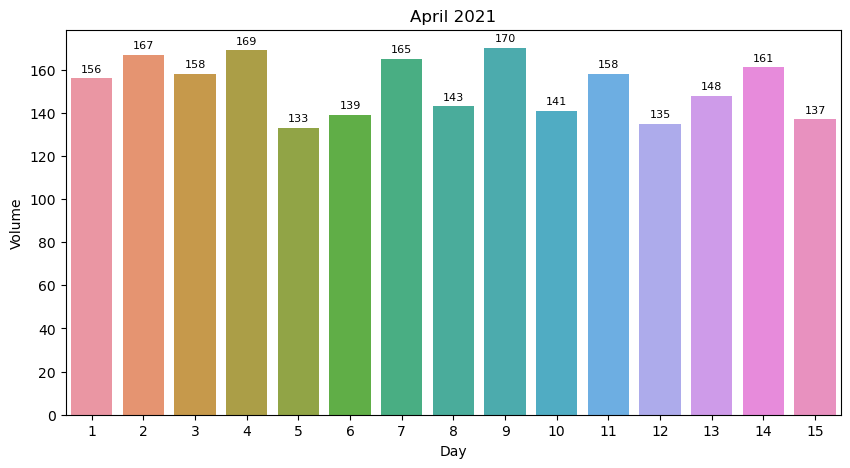

In [55]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=total_volume_of_each_day.index, y =total_volume_of_each_day)



for x, y in enumerate(total_volume_of_each_day):
    plt.annotate(y, xy=(x, y), xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=8)

plt.xlabel('Day')
plt.title('April 2021')

In [93]:
#Total sum of volume for each day
total_sales_of_each_day = df.groupby('Dayn')['Net Sales Value'].sum()
total_sales_of_each_day = total_sales_of_each_day.apply(lambda x: '{:.2f}'.format(x))
total_sales_of_each_day = total_sales_of_each_day.astype('float') 
total_sales_of_each_day

Dayn
1     1077838.19
2     1017006.33
3      773650.15
4      892387.83
5      815976.94
6      873564.21
7     1039149.67
8      922271.58
9      959580.94
10     816540.49
11     976842.75
12     834258.18
13     900223.14
14     898646.43
15     911914.43
Name: Net Sales Value, dtype: float64

# Mean and Median Net Sale Value

In [94]:
print('Median : ',total_sales_of_each_day.median(), 'Mean : ', total_sales_of_each_day.mean())

Median :  900223.14 Mean :  913990.084


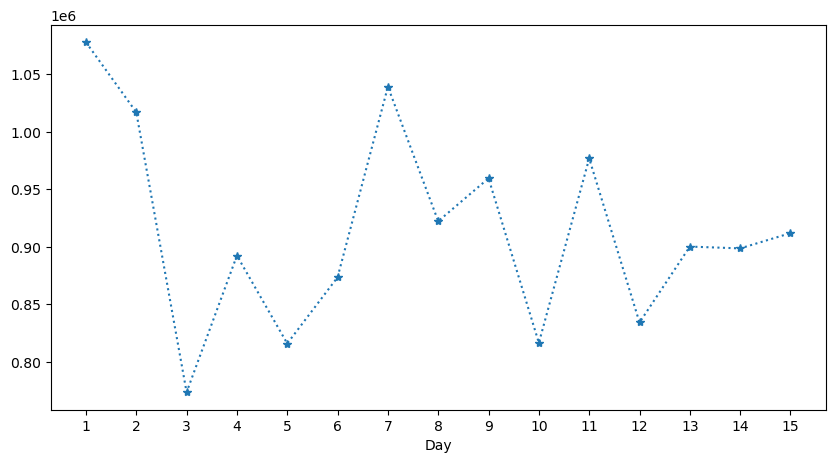

In [87]:
figure = plt.figure(figsize=(10,5))
plt.plot(total_sales_of_each_day,  linestyle=':', marker='*');
plt.xlabel('Day')
plt.xticks(total_sales_of_each_day.index);


# The total volume is between 133 - 170
# Highest volume (170) was on day 9

# Daily Average Sale Price of each product

In [121]:
#Getting the products
products = df.Model.unique()
products

array(['RU-10', 'RU-9 Plus', 'YM-99', 'YM-99 Plus', 'YM-98 ', 'RU-9',
       'S-20', 'S-21', 'O-10', 'O-11', 'Babaji Oil ', 'Vedic Cream',
       'Vedic Shampoo', 'Babaji Shampoo', 'Babaji Cream', 'Vedic Oil',
       'Gear Oil', 'Gear Cream', 'Gear Shampoo', 'Gear BB Cream',
       'M- T Shirts', 'M- Inners', 'W-Casuals', 'W-Inners', 'M-Jeans',
       'M-Casuals', 'W-Western', 'W-Lounge', 'M-Formals', 'M-Shoes'],
      dtype=object)

In [122]:
# Getting the average sale price for each product.
#It is different from Avg Price which is the AVG Price before deducting the discount amount
df['Avg Sale Price'] = df['Net Sales Value' ]/df['Volume']
df.head()

,Date,Dayn,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,discount,Avg Sale Price
0,2021-04-01,1,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180,174.822304,10689.766745
1,2021-04-01,1,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039,115.604980,8932.389704
2,2021-04-01,1,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843,66.198200,14577.441406
3,2021-04-01,1,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298,41.612312,18705.987550
4,2021-04-01,1,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770,53.986990,6642.351257


In [123]:
#Average sale price of products across 15 days
list_of_asp=[]
dict_of_asp = {}
for product in products:
    list_of_asp = df[df['Model']==product]['Avg Sale Price'].to_list()
    dict_of_asp[product] = list_of_asp

avg_sales_price_of_products = pd.DataFrame(dict_of_asp, index=list(range(1,16)))
avg_sales_price_of_products

,RU-10,RU-9 Plus,YM-99,YM-99 Plus,YM-98,RU-9,S-20,S-21,O-10,O-11,...,M- T Shirts,M- Inners,W-Casuals,W-Inners,M-Jeans,M-Casuals,W-Western,W-Lounge,M-Formals,M-Shoes
1,10689.766745,8932.389704,14577.441406,18705.987550,6642.351257,6723.284398,44568.653427,51095.437839,51017.032428,54133.005422,...,362.126327,404.028384,737.452194,1056.809490,1680.488795,1055.052986,2204.209437,1286.287803,1583.297787,2586.106321
2,10514.036016,8942.165341,14519.605477,18850.807471,6582.451288,6642.928126,46521.212738,49101.724080,50449.446602,54638.657000,...,370.424401,423.255491,751.430311,1065.908999,1718.781638,1098.953313,2131.557538,1338.223642,1550.478745,2572.852729
3,10784.390523,8996.631731,14704.445347,18260.056138,6711.112559,6598.916692,44876.869762,49976.611092,50192.168956,57090.298864,...,363.645582,413.193390,755.815621,1048.346854,1779.222956,1058.167162,2147.431437,1306.657381,1596.376785,2621.234063
4,10409.484076,8842.079693,14744.745525,18919.995141,6740.063490,6822.136771,44892.498781,49867.338310,51402.540101,56436.783934,...,367.532917,401.076281,764.191553,1051.322236,1725.614905,1044.355309,2190.158851,1280.369938,1540.820924,2552.173461
5,10631.282497,8628.621758,14796.368979,18542.653833,6851.249488,6696.380665,44910.651542,50889.119451,50920.890558,54639.261227,...,372.623830,413.277462,740.939646,1090.419243,1701.453930,1074.065142,2129.603626,1318.302438,1570.456573,2617.268697
6,10537.948238,8857.545368,14855.040599,18645.996805,6498.886659,6700.267084,46438.531230,50394.163178,50464.642808,55738.725962,...,376.086394,416.675973,756.450280,1104.432937,1776.557977,1086.357712,2183.034299,1319.915550,1554.522222,2492.737131
7,10668.472345,8833.200486,14692.650328,18494.248643,6672.894655,6798.688336,44848.811347,50216.309289,50433.353834,54201.062126,...,361.292275,411.793225,764.786238,1086.544134,1720.752815,1087.099650,2145.565305,1288.833194,1590.303709,2545.206349
8,10290.841128,8797.951907,14863.618919,18935.244782,6514.520779,6818.480256,44563.920560,48870.649480,52312.049496,54360.550805,...,380.549102,418.160429,759.405776,1046.002814,1715.506539,1103.276154,2119.990775,1351.807493,1552.747607,2559.162864
9,10384.131854,8886.092862,14995.821014,18651.119047,6709.754051,6752.339545,45495.139697,48813.690200,51533.209108,56229.608104,...,363.866322,404.981129,749.764187,1068.712274,1740.539918,1085.821740,2143.383867,1296.533801,1564.737531,2543.018637
10,10762.255749,8979.992665,14654.647717,18608.313554,6759.138298,6648.725613,45268.795303,48778.846687,51645.828492,56001.714492,...,370.947568,412.471164,758.774987,1099.961592,1685.154630,1046.011694,2162.846805,1295.868003,1564.003151,2565.033828


In [124]:
# Day count
days = avg_sales_price_of_products.index.to_list()
days

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Line graph representing the change in Average Sale price of each product accross 15 days

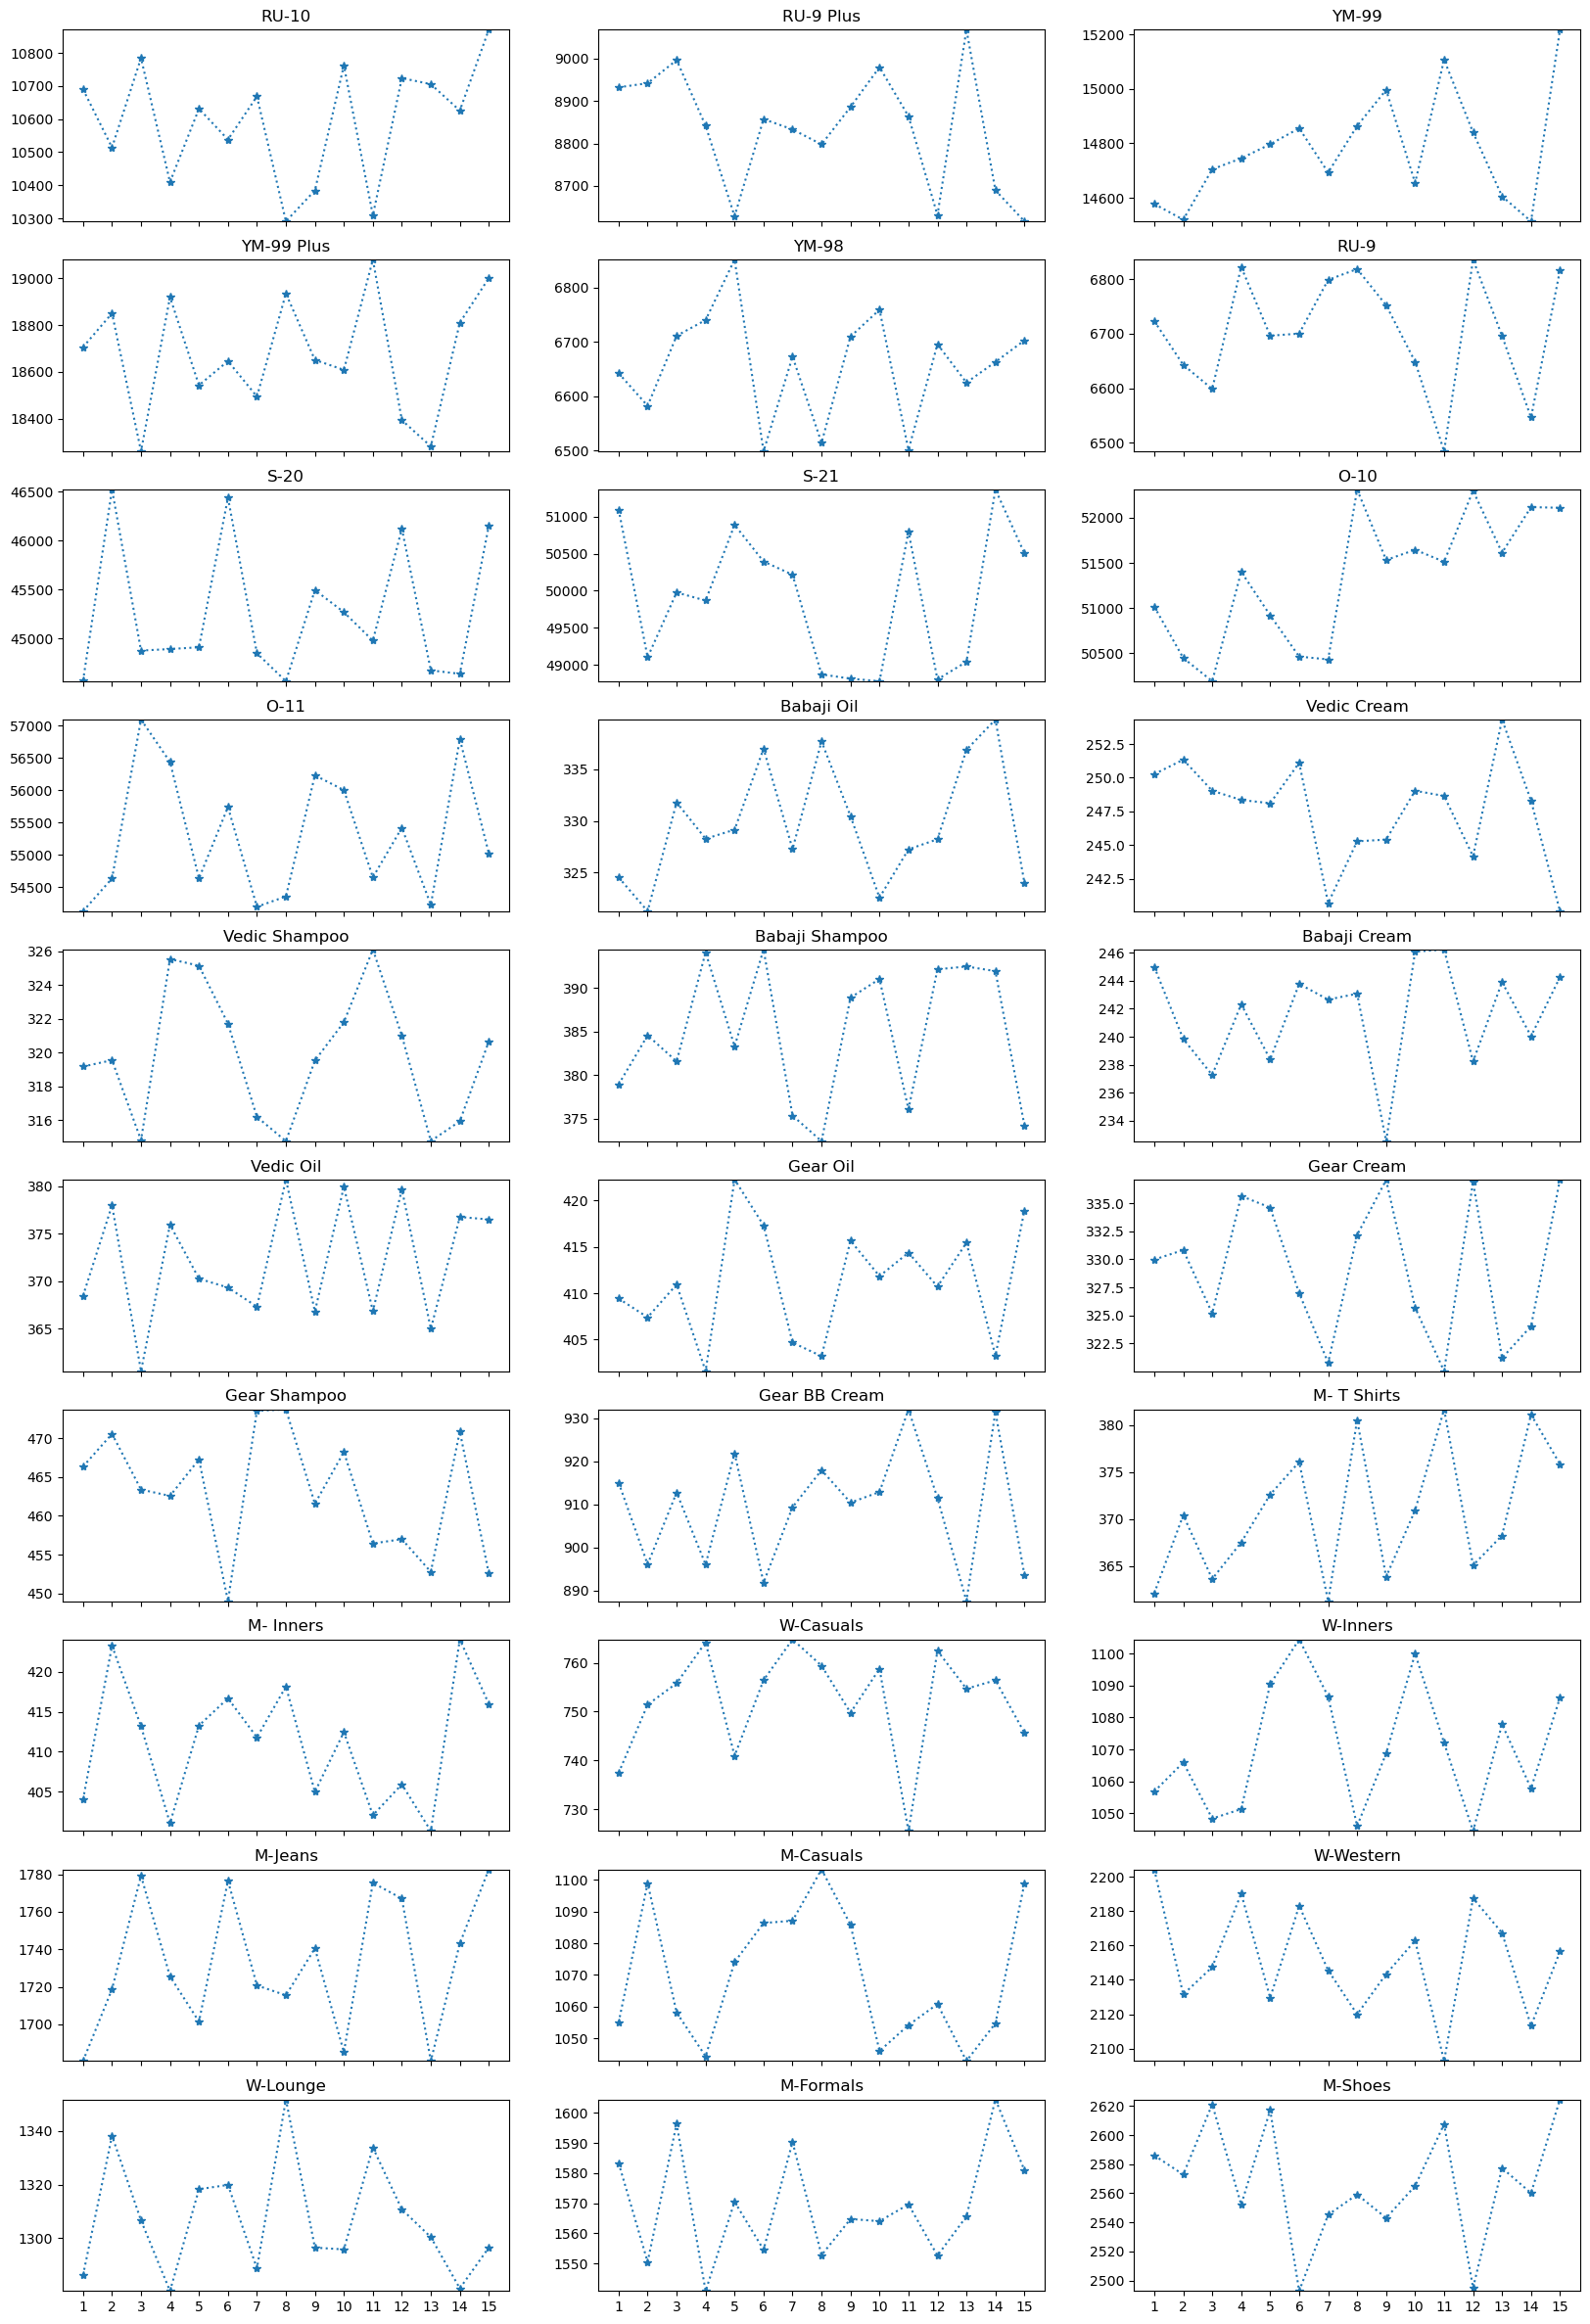

In [125]:

fig, ax = plt.subplots(nrows=10, ncols=3,  figsize=(20,30),sharex=True)
ax = ax.flatten()

for a, product in zip(ax, products):
    a.plot(avg_sales_price_of_products[product], linestyle=':', marker='*')

    a.set_title(product);

    mini = avg_sales_price_of_products[product].min();
    maxi = avg_sales_price_of_products[product].max();

    a.set_ylim(mini, maxi)

    a.set_xticks(days)



# Histogram of Discount Rate (%)

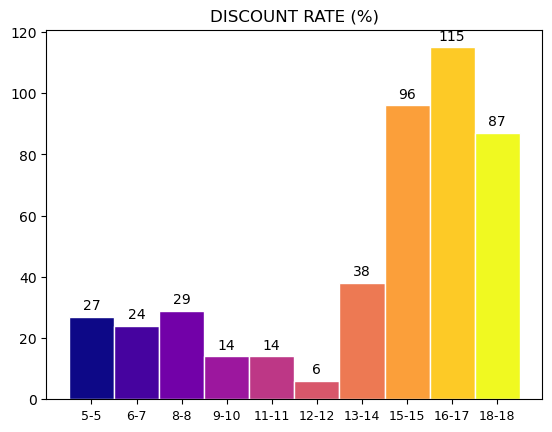

In [133]:
n, bins, patches = plt.hist(df['Discount Rate (%)'], edgecolor='white')

bin_labels =[f'{int(bins[i])}-{int(bins[i+1])-1}' for i in range(len(bins)-1)] #Defining the labels for bins
bin_centers = [(bins[i] + bins[i+1])/2  for i in range(len(bins)-1)] #Defining the location for bin labels

plt.xticks(bin_centers, bin_labels,fontsize=9 ) #Setting the x-axis labels
plt.title('DISCOUNT RATE (%)')

colors = plt.cm.plasma(np.linspace(0,1,len(patches))) #Getting colors from color maps
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

for i, patch in zip(n, patches):
    plt.annotate(int(i), xy=(patch.get_x() + patch.get_width()/2, i), xytext=(0,3), textcoords='offset points',ha='center', va='bottom', )

# The histogram clearly shows that majority of the products have discount rate more than 13% with median discount rate is expected to lie between 16-17 %

# Discount Rate of BU

In [127]:

average_dis_rate_of_BU = df.groupby('BU')['Discount Rate (%)'].mean()
average_dis_rate_of_BU = average_dis_rate_of_BU.apply(lambda x: '{:.2f}'.format(x))
average_dis_rate_of_BU = average_dis_rate_of_BU.astype('float')
average_dis_rate_of_BU

BU
FMCG         17.43
Lifestyle    17.47
Mobiles      10.56
Name: Discount Rate (%), dtype: float64

In [128]:
df2 = df
df2['discount'] = df['Discount Rate (%)'] * df['Volume']
df2 = df2.groupby('BU')[['discount','Volume']].sum()
df2['Average Discount'] = df2['discount']/df2['Volume']
average_dis_rate_of_BU = df2['Average Discount'].apply(lambda x: '{:.2f}'.format(x))
average_dis_rate_of_BU = average_dis_rate_of_BU.astype('float')
average_dis_rate_of_BU

BU
FMCG         17.52
Lifestyle    17.49
Mobiles      11.11
Name: Average Discount, dtype: float64

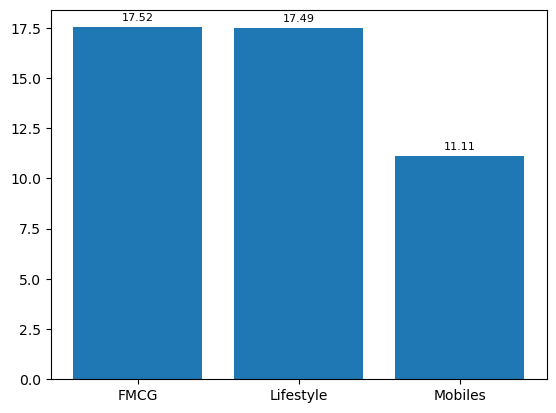

In [129]:
plt.bar(height = average_dis_rate_of_BU, x=average_dis_rate_of_BU.index)

for x, y in enumerate(average_dis_rate_of_BU):
    plt.annotate(y, xy=(x, y), xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=8)

# Average Discount rate on each day

In [130]:
df2 = df
df2['discount'] = df['Discount Rate (%)'] * df['Volume']
df2 = df2.groupby('Day')[['discount','Volume']].sum()
df2['Average Discount'] = df2['discount']/df2['Volume']
average_dis_rate_of_BU = df2['Average Discount'].apply(lambda x: '{:.2f}'.format(x))
average_dis_rate_of_BU = average_dis_rate_of_BU.astype('float')
average_dis_rate_of_BU

Day
Friday       15.89
Monday       15.80
Saturday     16.11
Sunday       15.90
Thursday     15.44
Tuesday      15.23
Wednesday    15.69
Name: Average Discount, dtype: float64

# Average Sale Price of each product

In [131]:
average_sale_price_of_each_prod = avg_sales_price_of_products.mean().to_frame()
average_sale_price_of_each_prod = average_sale_price_of_each_prod.astype(int)
average_sale_price_of_each_prod.T

,RU-10,RU-9 Plus,YM-99,YM-99 Plus,YM-98,RU-9,S-20,S-21,O-10,O-11,...,M- T Shirts,M- Inners,W-Casuals,W-Inners,M-Jeans,M-Casuals,W-Western,W-Lounge,M-Formals,M-Shoes
0,10593,8837,14779,18678,6658,6705,45263,49901,51335,55306,...,370,411,752,1070,1732,1070,2151,1307,1569,2567


# Line graph of average sale price of products

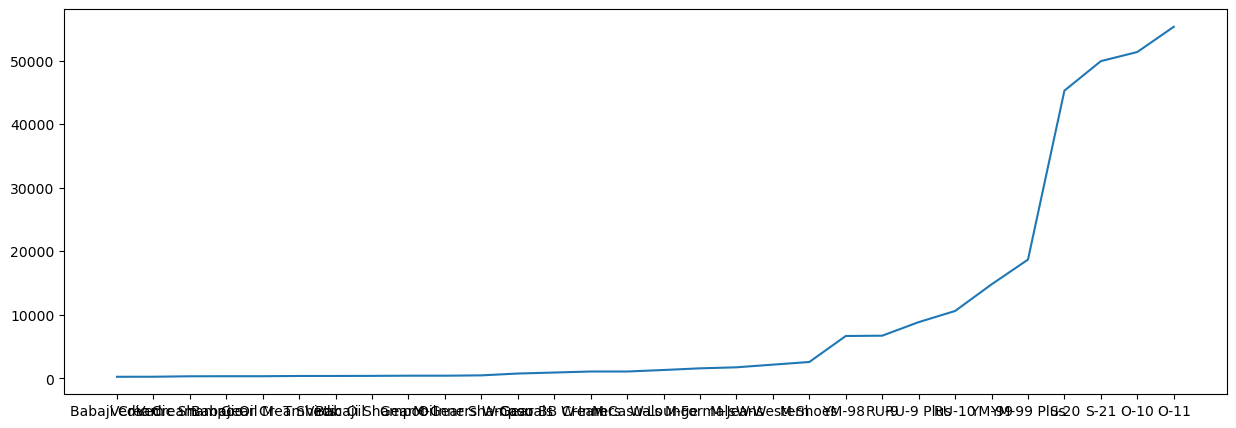

In [90]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
ax.plot(average_sale_price_of_each_prod.sort_values(by=0))
average_sale_price_of_each_prod = average_sale_price_of_each_prod.sort_values(by=0)


# Histogram of Daily Average Sale Price.

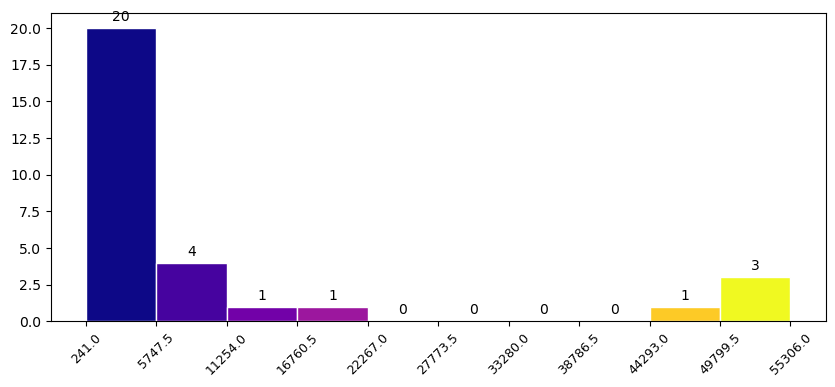

In [135]:
fig = plt.figure(figsize=(10,4))
n, bins, patches = plt.hist(average_sale_price_of_each_prod, edgecolor='white', )

bin_labels =[f'{int(bins[i])}-{int(bins[i+1])-1}' for i in range(len(bins)-1)] #Defining the labels for bins
bin_centers = [(bins[i] + bins[i+1])/2  for i in range(len(bins)-1)] #Defining the location for bin labels

plt.xticks(bins, bins,fontsize=9, rotation=45 ) #Setting the x-axis labels

colors = plt.cm.plasma(np.linspace(0,1,len(patches))) #Getting colors from color maps
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

for i, patch in zip(n, patches):
    plt.annotate(int(i), xy=(patch.get_x() + patch.get_width()/2, i), xytext=(0,3), textcoords='offset points',ha='center', va='bottom', )

# The histogram shows that 1/3rd of the products have average price between (241  -  5,747)

# Histogram of Average Sales Price of each product each day

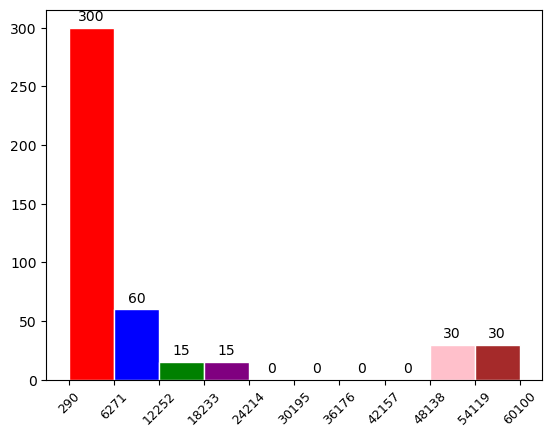

In [21]:
n, bins, patches = plt.hist(df['Avg Price'], edgecolor='white')
plt.xticks(bins, fontsize=9, rotation=45);
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'pink', 'brown']

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

for i, patch in zip(n, patches):
    plt.annotate(int(i), xy=(patch.get_x() + patch.get_width()/2, i), xytext=(0,3), textcoords='offset points',ha='center', va='bottom', )

# This histogram also shows the similar proportion of values in respective bins

# Histogram of Net Sales Value

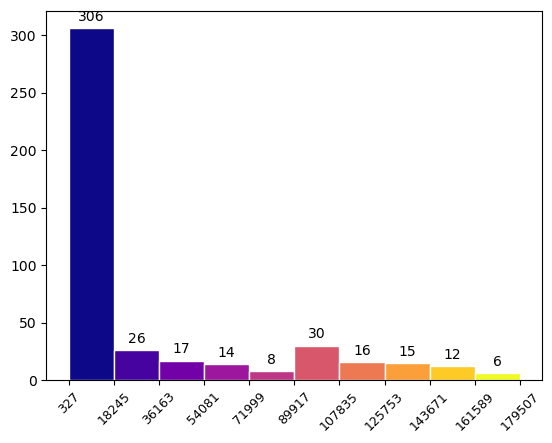

In [91]:
n, bins, patches = plt.hist(df['Net Sales Value'], edgecolor='white')
plt.xticks(bins, fontsize=9, rotation=45);
colors = plt.cm.plasma(np.linspace(0,1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

for i, patch in zip(n, patches):
    plt.annotate(int(i), xy=(patch.get_x() + patch.get_width()/2, i), xytext=(0,3), textcoords='offset points',ha='center', va='bottom', )

In [53]:
df

,Date,Dayn,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Avg Sale Price
0,2021-04-01,1,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180,10689.766745
1,2021-04-01,1,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039,8932.389704
2,2021-04-01,1,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843,14577.441406
3,2021-04-01,1,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298,18705.987550
4,2021-04-01,1,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770,6642.351257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2021-04-15,15,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127,1098.816064
446,2021-04-15,15,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758,2156.517293
447,2021-04-15,15,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394,1296.551197
448,2021-04-15,15,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174,1580.932725


# Net Sales Value of Each BU

In [150]:
net_sales_value_of_each_BU = df.groupby(['BU'])['Net Sales Value'].sum().apply(lambda x: '{:.0f}'.format(x))
net_sales_value_of_each_BU = net_sales_value_of_each_BU.astype('int')
net_sales_value_of_each_BU

BU
FMCG           327656
Lifestyle      741970
Mobiles      12640225
Name: Net Sales Value, dtype: int32

Text(0.5, 1.0, 'Net Sales Value')

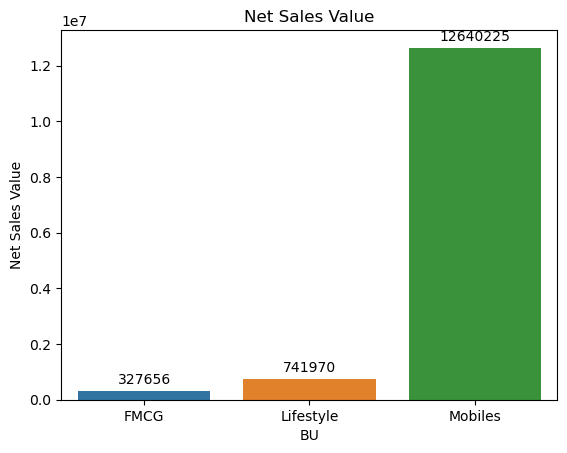

In [161]:
sns.barplot(y=net_sales_value_of_each_BU, x=net_sales_value_of_each_BU.index)



for x, y in enumerate(net_sales_value_of_each_BU):
    plt.annotate(y, xy=(x, y), xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.xlabel('BU')
plt.ylabel('Net Sales Value')
plt.title('Net Sales Value')


In [162]:
total_volume_of_each_bu = df.groupby('BU')['Volume'].sum()
total_volume_of_each_bu

BU
FMCG         929
Lifestyle    710
Mobiles      641
Name: Volume, dtype: int64

# Bar plot of Volume of each BU

Text(0, 0.5, 'Volume')

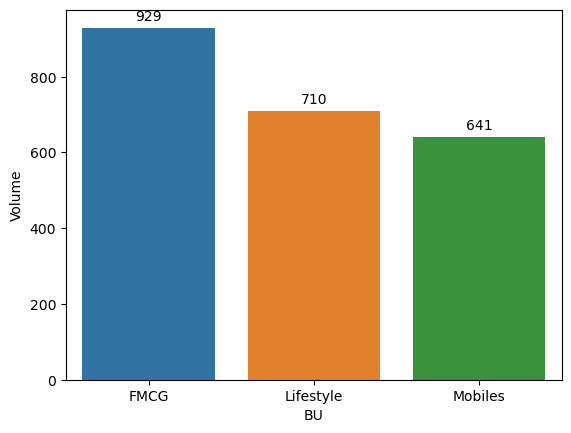

In [163]:
sns.barplot(y=total_volume_of_each_bu, x=total_volume_of_each_bu.index)



for x, y in enumerate(total_volume_of_each_bu):
    plt.annotate(y, xy=(x, y), xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.xlabel('BU')
plt.ylabel('Volume')



# Histogram of Discount Amount

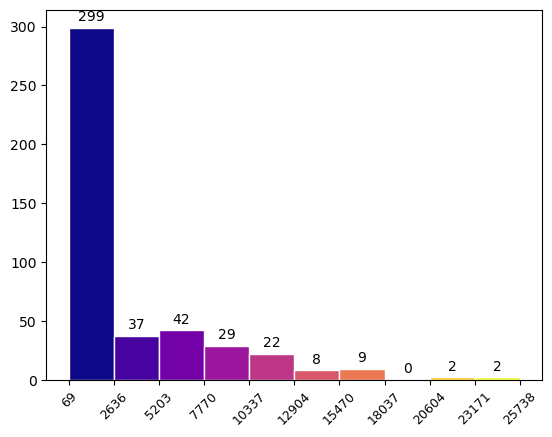

In [24]:
n, bins, patches = plt.hist(df['Discount Amount'], edgecolor='white')
plt.xticks(bins, fontsize=9, rotation=45);
colors = plt.cm.plasma(np.linspace(0,1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

for i, patch in zip(n, patches):
    plt.annotate(int(i), xy=(patch.get_x() + patch.get_width()/2, i), xytext=(0,3), textcoords='offset points',ha='center', va='bottom', )

# Histogram of Net Sales Value

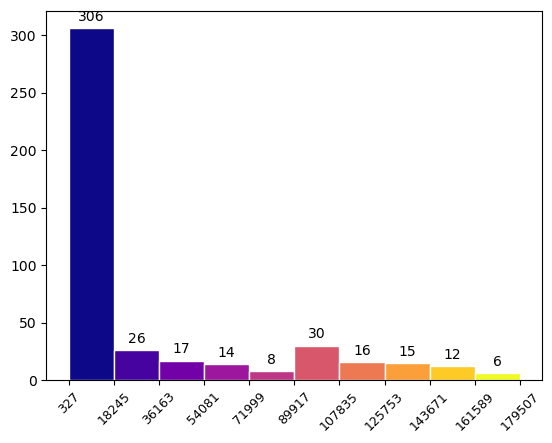

In [25]:
n, bins, patches = plt.hist(df['Net Sales Value'], edgecolor='white')
plt.xticks(bins, fontsize=9, rotation=45);
colors = plt.cm.plasma(np.linspace(0,1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

for i, patch in zip(n, patches):
    plt.annotate(int(i), xy=(patch.get_x() + patch.get_width()/2, i), xytext=(0,3), textcoords='offset points',ha='center', va='bottom', )

In [164]:
df

,Date,Dayn,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,discount,Avg Sale Price
0,2021-04-01,1,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180,174.822304,10689.766745
1,2021-04-01,1,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039,115.604980,8932.389704
2,2021-04-01,1,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843,66.198200,14577.441406
3,2021-04-01,1,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298,41.612312,18705.987550
4,2021-04-01,1,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770,53.986990,6642.351257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2021-04-15,15,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127,30.951375,1098.816064
446,2021-04-15,15,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758,102.342163,2156.517293
447,2021-04-15,15,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394,37.931100,1296.551197
448,2021-04-15,15,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174,50.379043,1580.932725


In [206]:
mobiles = df[df['BU']=='Mobiles'][['Model','Volume','Avg Sale Price', 'Net Sales Value']]
mobiles

,Model,Volume,Avg Sale Price,Net Sales Value
0,RU-10,15,10689.766745,160346.501180
1,RU-9 Plus,10,8932.389704,89323.897039
2,YM-99,7,14577.441406,102042.089843
3,YM-99 Plus,6,18705.987550,112235.925298
4,YM-98,3,6642.351257,19927.053770
...,...,...,...,...
425,RU-9,3,6816.791624,20450.374871
426,S-20,3,46149.974013,138449.922039
427,S-21,1,50506.355924,50506.355924
428,O-10,3,52110.323297,156330.969890


In [207]:
mobiles_sum = mobiles.groupby('Model')[['Volume','Net Sales Value']].sum()

mobiles_sum

,Volume,Net Sales Value
Model,,
O-10,35,1.798311e+06
O-11,33,1.821642e+06
RU-10,143,1.510555e+06
RU-9,42,2.815217e+05
RU-9 Plus,99,8.750810e+05
S-20,43,1.943895e+06
S-21,27,1.350306e+06
YM-98,59,3.922431e+05
YM-99,82,1.210668e+06


In [216]:
mobiles_asp = mobiles.groupby('Model')['Avg Sale Price'].mean()
mobiles_asp

Model
O-10          51335.054493
O-11          55306.101578
RU-10         10593.771360
RU-9           6705.480899
RU-9 Plus      8837.790883
S-20          45263.258069
S-21          49901.034967
YM-98          6658.026714
YM-99         14779.131276
YM-99 Plus    18678.719307
Name: Avg Sale Price, dtype: float64

In [217]:
mobiles_asp_and_sum = pd.concat([mobiles_sum, mobiles_asp ], axis=1)
mobiles_asp_and_sum

,Volume,Net Sales Value,Avg Sale Price
Model,,,
O-10,35,1.798311e+06,51335.054493
O-11,33,1.821642e+06,55306.101578
RU-10,143,1.510555e+06,10593.771360
RU-9,42,2.815217e+05,6705.480899
RU-9 Plus,99,8.750810e+05,8837.790883
S-20,43,1.943895e+06,45263.258069
S-21,27,1.350306e+06,49901.034967
YM-98,59,3.922431e+05,6658.026714
YM-99,82,1.210668e+06,14779.131276


In [218]:
bins = [0, 15000, 25000, 60000 ]
labels = ['Below 15,000', '15,000 - 25,000', '40,000 - 60,000']

mobiles_asp_and_sum['Price Range'] = pd.cut(mobiles_asp_and_sum['Avg Sale Price'], bins, labels = labels)
mobiles_price_range_nsv_and_volume = mobiles_asp_and_sum.groupby('Price Range')[['Net Sales Value', 'Volume']].sum()


,Net Sales Value,Volume
Price Range,,
"Below 15,000",4.270069e+06,425
"15,000 - 25,000",1.456003e+06,78
"40,000 - 60,000",6.914154e+06,138


In [257]:
mobiles_price_range_nsv_and_volume['count'] = mobiles_asp_and_sum.groupby('Price Range')['Net Sales Value'].count()
mobiles_price_range_nsv_and_volume

,Net Sales Value,Volume,count
Price Range,,,
"Below 15,000",4270069,425,5
"15,000 - 25,000",1456002,78,1
"40,000 - 60,000",6914153,138,4


In [258]:
mobiles_price_range_nsv_and_volume['count'].to_frame()

,count
Price Range,
"Below 15,000",5
"15,000 - 25,000",1
"40,000 - 60,000",4


In [249]:
mobiles_price_range_nsv_and_volume['Net Sales Value'] = mobiles_price_range_nsv_and_volume['Net Sales Value'].astype('int')
mobiles_price_range_nsv_and_volume['Net Sales Value']

Price Range
Below 15,000       4270069
15,000 - 25,000    1456002
40,000 - 60,000    6914153
Name: Net Sales Value, dtype: int32

In [241]:
mobiles_asp_and_sum['Net Sales Value'] = mobiles_asp_and_sum['Net Sales Value'].apply(lambda x : '{:.0f}'.format(x))
mobiles_asp_and_sum['Net Sales Value'] = mobiles_asp_and_sum['Net Sales Value'].astype('int')

mobiles_asp_and_sum['Avg Sale Price'] = mobiles_asp_and_sum['Avg Sale Price'].apply(lambda x : '{:.0f}'.format(x))
mobiles_asp_and_sum['Avg Sale Price'] = mobiles_asp_and_sum['Avg Sale Price'].astype('int')


Text(0.5, 1.0, 'Mobile Price')

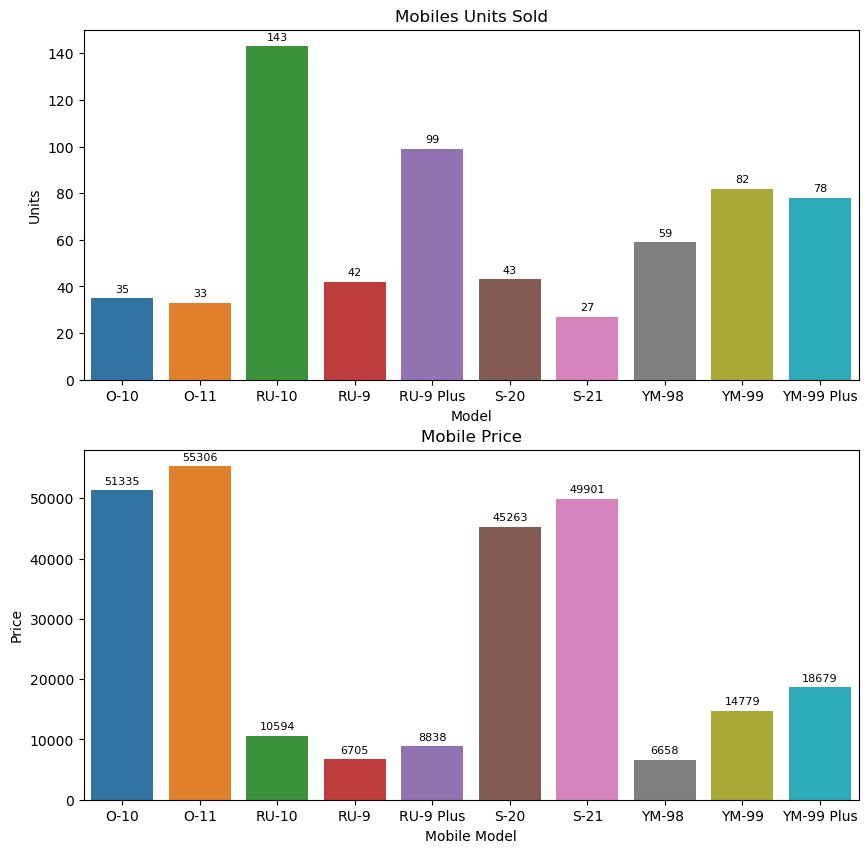

In [242]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
sns.barplot(x=mobiles_asp_and_sum.index, y=mobiles_asp_and_sum['Volume'])

for x, y in enumerate(mobiles_asp_and_sum['Volume']):
    plt.annotate(y, xy=(x, y), xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=8)
plt.ylabel('Units')
plt.title('Mobiles Units Sold')

ax = fig.add_subplot(212)
sns.barplot(x=mobiles_asp_and_sum.index, y=mobiles_asp_and_sum['Avg Sale Price'])

for x, y in enumerate(mobiles_asp_and_sum['Avg Sale Price']):
    plt.annotate(y, xy=(x, y), xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=8)
plt.xlabel('Mobile Model')
plt.ylabel('Price')
plt.title('Mobile Price')



Text(0.5, 1.0, 'Mobiles Total Revenue')

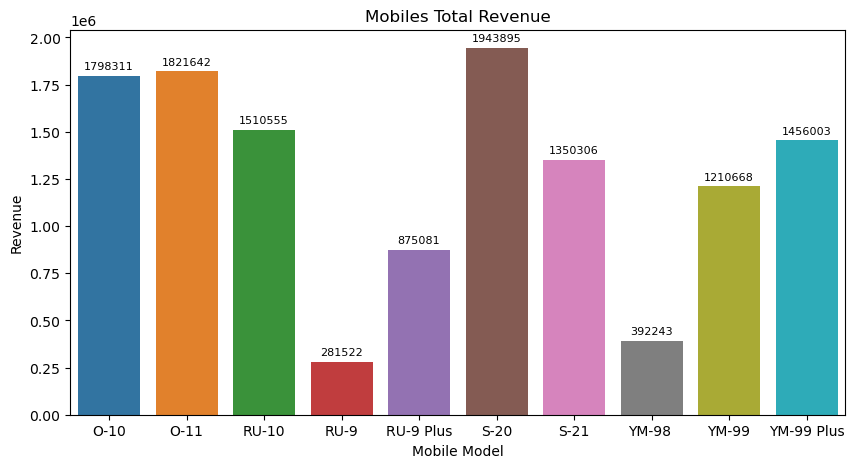

In [243]:
fig = plt.figure(figsize=(10,5))

sns.barplot(x=mobiles_asp_and_sum.index, y=mobiles_asp_and_sum['Net Sales Value'])

for x, y in enumerate(mobiles_asp_and_sum['Net Sales Value']):
    plt.annotate(y, xy=(x, y), xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=8)

plt.xlabel('Mobile Model')
plt.ylabel('Revenue')
plt.title('Mobiles Total Revenue')

Text(0.5, 1.0, 'Mobiles Sold in Different Price Range')

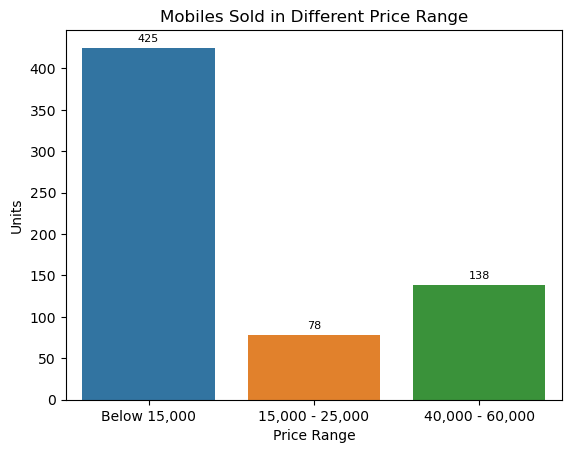

In [245]:
sns.barplot(x=mobiles_price_range_nsv_and_volume.index, y=mobiles_price_range_nsv_and_volume['Volume'])

for x, y in enumerate(mobiles_price_range_nsv_and_volume['Volume']):
    plt.annotate(y, xy=(x, y), xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=8)


plt.ylabel('Units')
plt.title('Mobiles Sold in Different Price Range')

Text(0.5, 1.0, 'Revenue in Different Price Range')

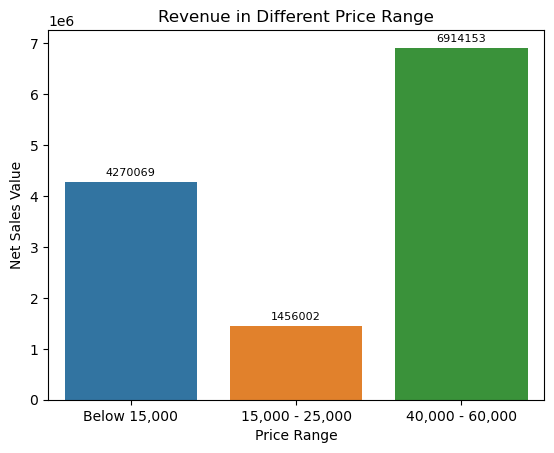

In [251]:
sns.barplot(x=mobiles_price_range_nsv_and_volume.index, y=mobiles_price_range_nsv_and_volume['Net Sales Value'])

for x, y in enumerate(mobiles_price_range_nsv_and_volume['Net Sales Value']):
    plt.annotate(y, xy=(x, y), xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=8)



plt.title('Revenue in Different Price Range')

# Box Plot of Numerical Columns

Volume :
Q1 =  3.00 , Q3 =  6.00
IQR :  3.00
Lowest Outlier = 11.00 

Avg Price :
Q1 =  465.00 , Q3 =  10100.00
IQR :  9635.00
Lowest Outlier = 49100.00 

Total Sales Value :
Q1 =  2700.00 , Q3 =  53200.00
IQR :  50500.00
Lowest Outlier = 133100.00 

Discount Amount :
Q1 =  460.46 , Q3 =  5316.50
IQR :  4856.04
Lowest Outlier = 12622.50 

Net Sales Value :
Q1 =  2202.21 , Q3 =  47847.91
IQR :  45645.70
Lowest Outlier = 116881.41 



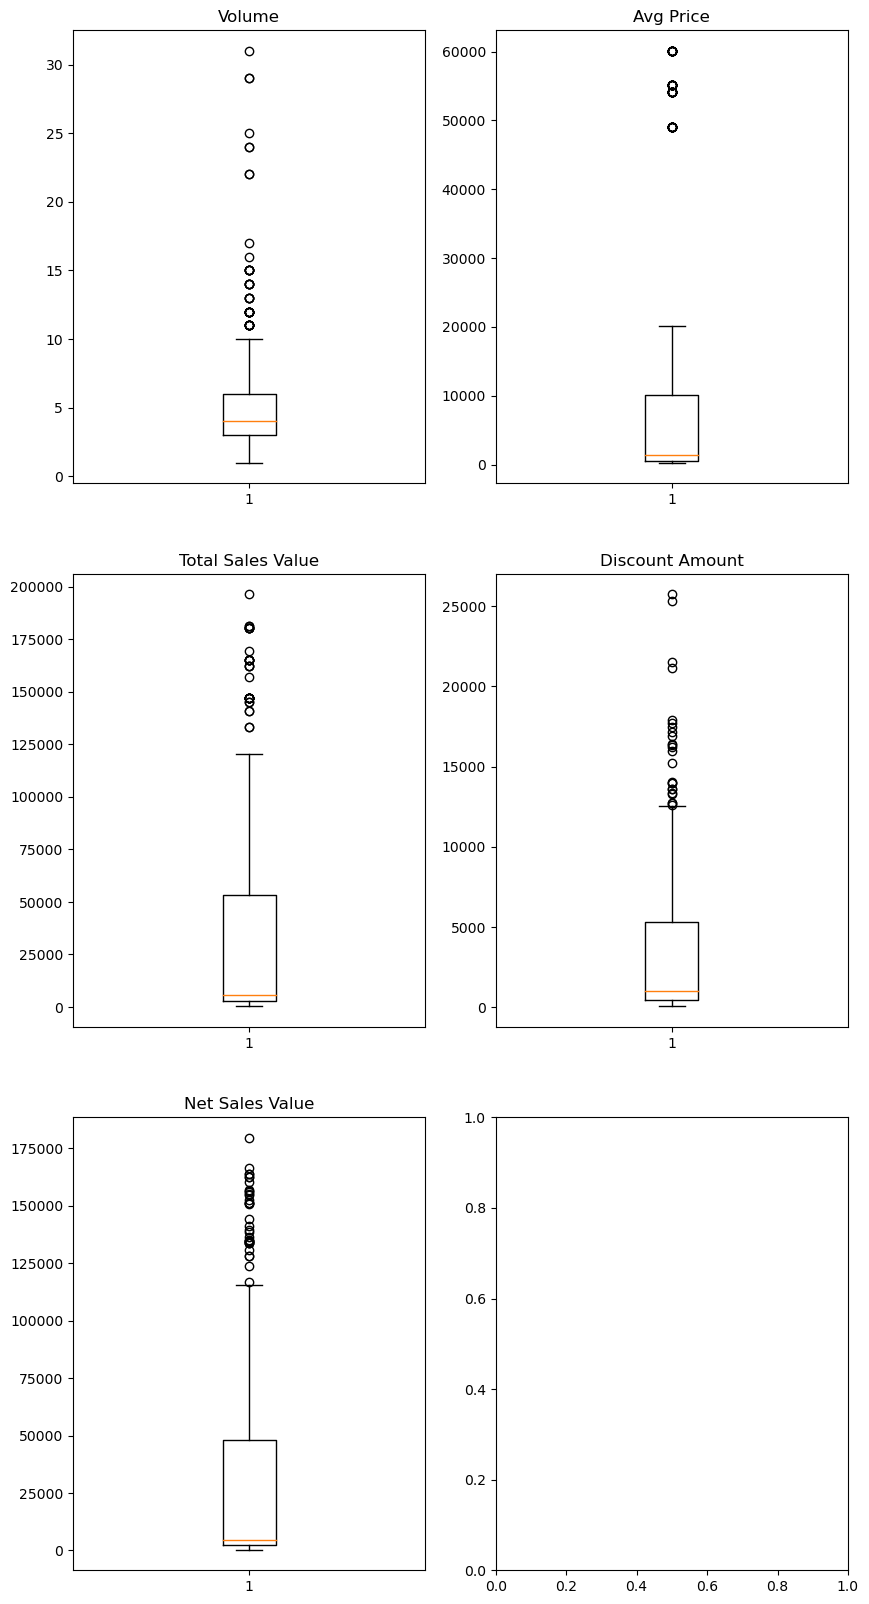

In [185]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,20))
list_of_cols = ['Volume','Avg Price', 'Total Sales Value', 'Discount Amount', 'Net Sales Value']
axs = axs.flatten()
axs=np.delete(axs, 5)
k=0
for ax in axs:
    
        box_dict = ax.boxplot(df[list_of_cols[k]])
        ax.set_title(list_of_cols[k])
        
        print(list_of_cols[k],':')
        
        #IQR Calculation
        q1_q3 = box_dict['boxes'][0].get_ydata()[[0,2]]
        q1 = '{:.2f}'.format(q1_q3[0])
        q3 = '{:.2f}'.format(q1_q3[1])
        print('Q1 = ',q1,", Q3 = ",q3)
        iqr = q1_q3[1] - q1_q3[0]
        iqr = '{:.2f}'.format(iqr)
        print('IQR : ',iqr)
        
        
        #Outliers
        outliers = set(box_dict['fliers'][0].get_ydata())
        first_outlier = min(outliers)
        first_outlier = '{:.2f}'.format(first_outlier)
        print("Lowest Outlier =",first_outlier,'\n')
        
        k=k+1



# Box Plot of Discount Rate

[Q1 Q3] =  [13.97, 18.11]
IQR Discount Rate:  4.14
Highest Outlier of Discount Rate : 7.732667088605965


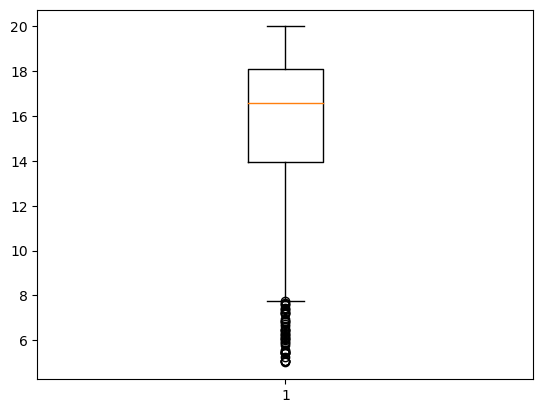

In [263]:
#Box & Whisker plot of Discount Rate
dis_rate_box = plt.boxplot(df['Discount Rate (%)'])
q1_q3 = dis_rate_box['boxes'][0].get_ydata()[[0,2]]

#IQR Calculation
q1_q3 = ['{:.2f}'.format(x) for x in q1_q3]
q1_q3 = [float(x) for x in q1_q3]
print('[Q1 Q3] = ',q1_q3)
dis_rate_iqr = q1_q3[1] - q1_q3[0]
dis_rate_iqr = '{:.2f}'.format(dis_rate_iqr) 
print('IQR Discount Rate: ',dis_rate_iqr)

#Outliers of Discount Rate
dis_rate_outliers = dis_rate_box['fliers'][0].get_ydata()

print('Highest Outlier of Discount Rate :',max(dis_rate_outliers) )

# Standardization

## Standardization is the process of transforming our data into a standard scale, which is of much smaller range. The standardized data still holds the original pattern of variabilty and proportion

In [266]:
list_of_cols = ['Volume','Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

standard_cols= df[list_of_cols]

for column in list_of_cols:
    col_mean = df[column].mean();
    col_std = df[column].std();
    standard_cols[column] = (df[column]-col_mean)/col_std;

standard_cols
    

C:\Users\harshit\AppData\Local\Temp\ipykernel_2404\2594182316.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_cols[column] = (df[column]-col_mean)/col_std;


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


In [274]:
mean_and_std_of_standard_cols = standard_cols.mean().apply(lambda x: '{:.7f}'.format(x)).to_frame()
mean_and_std_of_standard_cols.columns = ['Mean']
mean_and_std_of_standard_cols['STD'] = standard_cols.std().apply(lambda x: '{:.7f}'.format(x)).to_frame()
mean_and_std_of_standard_cols

,Mean,STD
Volume,0.0000000,1.0000000
Avg Price,0.0000000,1.0000000
Total Sales Value,0.0000000,1.0000000
Discount Rate (%),-0.0000000,1.0000000
Discount Amount,-0.0000000,1.0000000
Net Sales Value,0.0000000,1.0000000


# Histogram for standardized columns

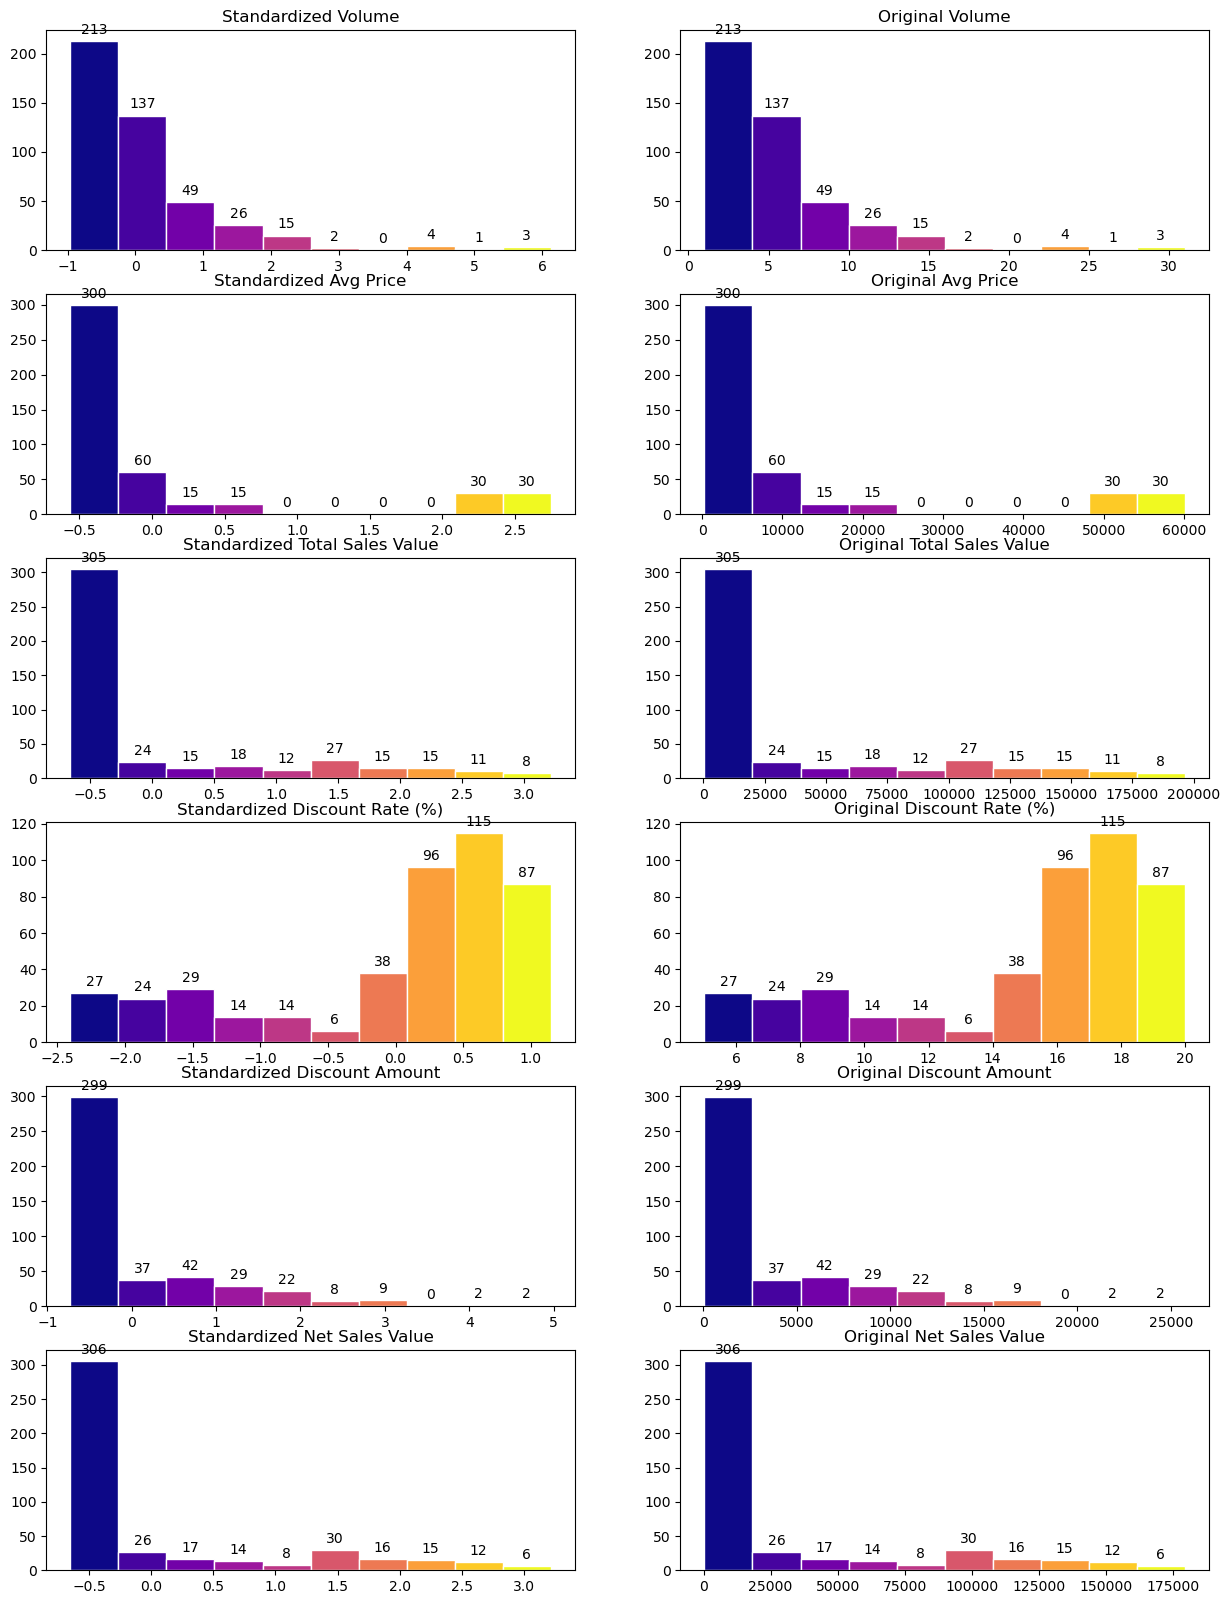

In [206]:
fig, axs = plt.subplots(6,2,figsize=(15,20))


for ax, column in zip(axs,list_of_cols):
    n, bins, patches = ax[0].hist(standard_cols[column], edgecolor='white')
    bins = np.round(bins,2)
    
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)

    for i, patch in zip(n, patches):
        ax[0].annotate(int(i), xy=(patch.get_x() + patch.get_width()/2, i), xytext=(0,3), textcoords='offset points',ha='center', va='bottom')
    ax[0].set_title(f'Standardized {column}')
        
    n, bins, patches = ax[1].hist(df[column], edgecolor='white')
    bins = np.round(bins,2)

    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)

    for i, patch in zip(n, patches):
        ax[1].annotate(int(i), xy=(patch.get_x() + patch.get_width()/2, i), xytext=(0,3), textcoords='offset points',ha='center', va='bottom', )
    ax[1].set_title(f'Original {column}')



# One-Hot Encoding

# All machine learning algorithms work on numerical data. Categorical data must be transformed into numbers.
# Adding dummy variables for each categorical value gives us data into numbers (0,1) in each variable.
# ML algorithms can do computations on this data.

# One -hot encoding can be applied to only one column which is 'BU' as it has 3 categorical values.
# Applying one-hot encoding to other categorical columns is not appropriate as they have too many values

In [11]:
BU_dummies = pd.get_dummies(df['BU'], dtype='int')
BU_dummies

,FMCG,Lifestyle,Mobiles
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
445,0,1,0
446,0,1,0
447,0,1,0
448,0,1,0


In [12]:
df_minus_BU = df.drop(['BU'], axis=1)


In [19]:
df_minus_BU.insert(5, 'Mobiles' ,BU_dummies['Mobiles'])
df_minus_BU.insert(6, 'Lifestyle' ,BU_dummies['Lifestyle'])
df_minus_BU.insert(7, 'FMCG' ,BU_dummies['FMCG'])


In [21]:
df_minus_BU

,Date,Day,SKU,City,Volume,Mobiles,Lifestyle,FMCG,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,1,0,0,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,1,0,0,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,1,0,0,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,1,0,0,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,1,0,0,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,0,1,0,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,0,1,0,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,0,1,0,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,0,1,0,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
